# Resposta de entrada nula de equações diferenciais

Renato Naville Watanabe

## Preparação do ambiente

In [1]:
import sympy as sym
import matplotlib.pyplot as plt

## Definição do problema

Aqui, vamos encontrar uma expressão para $y(t)$ que só dependa de $n$, dada uma equação de diferenças linear e invariante no tempo:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = b_M\frac{d^Mx}{dt^M} +...+b_2\frac{d^2x}{dt^2}+b_1\frac{dx}{dt} + b_0x(t) $$

## Composição da solução

A solução desta equação é formada por duas partes:

$$y(t) = y_{zi}(t) + y_{zs}(t)$$

em que $y_{zi}(t)$ é a parte de $y$ devida às condições iniciais do sinal de saída (os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$). Para o cálculo dessa componente, considera-se que a entrada $x(t)$ e todas as suas derivadas são nulas ($zi$ é de *zero input*, **entrada nula** em inglês). 

A outra componente, $y_{zs}(t)$, é devido à entrada $x(t)$. Para o cálculo dessa componente consideramos que os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$ são todos iguais a 0 ($zs$ é de *zero state*, **estado nulo** em inglês, às vezes também chamado de **repouso**).

Aqui, vamos entender como obter a reposta de entrada nula para sistemas contínuos lineares e invariantes no tempo. A resposta devido à entrada será abordada em outro momento.

## Solução pelo polinômio característico

Agora, vamos desenvolver um método para encontrar a expressão de $y_{zi}(t)$ sem ser necessário analisar o gráfico nem obter os valores de $y_{zi}(t)$ de forma recuirsiva.

Temos que achar um sinal que satisfaça a seguinte equação:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = 0$$

Para que essa soma dê zero, o formato de $y_{zi}(t)$ tem que ser o mesmo das derivadas do próprio sinal. Um sinal que tem esse formato é $ce^{\lambda t}$. A enésima derivada desse sinal é:

$$c\lambda^Ne^{\lambda t} = de^{\lambda t}$$

Portanto, um candidato para a solução da equação é $ce^{\lambda t}$. Substituindo esse sinal na equação acima:

$$c\lambda^Ne^{\lambda t} + a_{N-1}c\lambda^{N-1}e^{\lambda t} +...+a_0ce^{\lambda t} = 0$$

Pondo $c$ e $e^{\lambda t}$ em evidência:

$$ce^{\lambda t}\left(\lambda^N + a_{N-1}\lambda^{N-1}+...+a_0\right) = 0$$

como $e^{\lambda t}$ é diferente de 0 para qualquer $t$:

$$\lambda^N + a_{N-1}\lambda^{N-1}+...+a_0 = 0$$

Portanto, o valor de $\lambda$ é a solução do polinômio formado pelos coeficientes da equação diferecial. Esse polinômio é conhecido como **polinômio característico** da equação diferencial.  O polinômio acima pode ser decomposto da seguinte forma (Teorema Fundamental da Álgebra):

$$(\lambda-\lambda_1)(\lambda-\lambda_2)(\lambda-\lambda_3)...(\lambda-\lambda_N) = 0 $$

Então, existem $N$ soluções do polinômio. Portanto, $ce^{\lambda_i t}$ são soluções da equação diferencial. A solução geral é uma combinação linear de todas as soluções:

$$y_{zi}(t) = c_1e^{\lambda_1 t} + c_2e^{\lambda_2 t} + ... + c_Ne^{\lambda_N t} $$

A determinação dos valores de $c_i$ é feita a partir das condições iniciais ($y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$).

### Exemplo 1

Vamos encontrar a solução de entrada nula para a equação diferencial abaixo.

A equação é:
 
$\frac{dy}{dt} - 0.5y(t) = x(t)$

com $y(0) = 1$

O polinômio característico da equação é:

$\lambda - 0.5 = 0$

A solução da equação é:

$\lambda_1 = 0.5$

Portanto, a solução de entrada nula é:

$y_{zi}(t) = ce^{0.5^t}$ para $t\geq 0$.

Ou,

$y_{zi}(t) = ce^{0.5t}u[t]$

Para saber o valor de $c$, usamos $y(0) = 1$:

$y_{zi}(0) = ce^{0.5t} = 1 \rightarrow c = 1$

Portanto:

$y_{zi}(t) = e^{0.5t}u(t)$

### Exemplo 2

Vamos agora obter uma expressão da solução de entrada nula da seguinte equação diferencial:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} - 4y(t) = 3x(t) + \frac{dx}{dt}$

com 

$y(0) = 1$ e $\frac{dy}{dt}(0) = 0.5$

O polinômio característico é:

$\lambda^2 + 3\lambda -4 = 0$

As soluções dessa equação são $\lambda_1 = 1$ e $\lambda_2=-4$. Então a solução da equação de diferenças é:

$y_{zi}(t) = c_1e^t + c_2e^{-4t}$, para $t\geq 0 $

Utilizando as condições iniciais:

$y(0) = 1 = c_1 + c_2$

$\frac{dy}{dt}(0) = 0.5 = c_1 - 4c_2$

Então $c_1=0.9$ e $c_2=0.1$ e:

$y_{zi}(t) = 0.9e^t + 0.1e^{-4t}$, para $t\geq 0 $

O gráfico dos primeiros 10 segundos está abaixo:

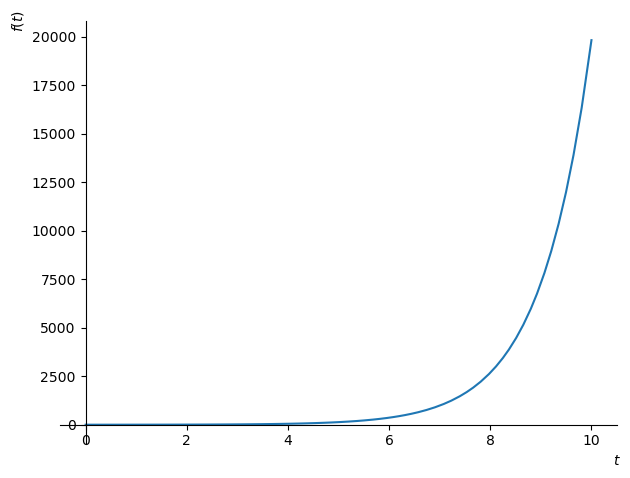

0.9*exp(t) + 0.1*exp(-4*t)

In [1]:
t = sym.symbols('t')
yzi = 0.9*sym.exp(t) + 0.1*sym.exp(-4*t)
sym.plot(yzi, (t, 0, 10))
yzi

## Caso de raízes complexas

No caso de raízes complexas, como a equação de diferenças tem coeficientes reais, elas sempre aparecerão em pares complexos conjugados ($\lambda_1 = \alpha+j\beta$ e $\lambda_2 = \alpha - j\beta$).

Então, a parte da solução devida a essas raízes é:

$$y_{zi}(t) = c_1e^{(\alpha+j\beta)t} + c_2e^{(\alpha-j\beta)t}$$

Como sinal é real, $c_1$ e $c_2$ também serão complexos conjugados:

$c_1 = \frac{c}{2}e^{j\theta}$ e $c_2 = \frac{c}{2}e^{-j\theta}$

Então:

$$y_{zi}(t) = \frac{c}{2}e^{j\theta}e^{(\alpha+j\beta)t} + \frac{c}{2}e^{-j\theta}e^{(\alpha-j\beta)t} = \frac{c}{2}e^{j\theta}e^{\alpha t}e^{j\beta t} + \frac{c}{2}e^{-j\theta}e^{\alpha t}e^{-j\beta t}=ce^{\alpha t}\left(\frac{e^{j(\beta t+\theta)} + e^{-j(\beta t+\theta)}}{2}\right) = ce^{\alpha t}\cos(\beta t+\theta)$$

É importante notar que se o polinômio característico tiver mais raízes reais, elas continuam sendo tratadas da mesma maneira.

### Exemplo 3

Considere um sistema com a seguinte equação diferencial:

$$\frac{d^2y}{dt^2} = -2\frac{dy}{dt} - 2y(t) + x(t)$$

com $y(0) = 0$ e $\frac{dy}{dt}(0) = -1$.

O polinômio característico do sistema é:

$\lambda^2 + 2\lambda + 2 = 0$

As raízes do polinômio são $\lambda_1= -1+j$ e $\lambda_2= -1-j$.

Então a solução de entrada nula é:

$$y_{zi}(t) = c_1e^{(-1+j)t} +  c_2e^{(-1-j)t} = $$

Usando as condições iniciais, temos:

$$c_1 + c_2 = 0$$

$$c_1(-1+j) +  c_2(-1-j)=-1$$

Resolvendo o sistema de equações acima chegamos a $c_1 = 0.5j=0.5e^{j\frac{\pi}{2}}$ e $c_2 =  -0.5j=0.5e^{-j\frac{\pi}{2}}$.

Então, a resposta de entrada nula é:

$y_{zi}(t) = 0.5e^{j\frac{\pi}{2}}e^{(-1+j)t} + 0.5e^{-j\frac{\pi}{2}}e^{(-1-j)t} = 0.5e^{-t}2\frac{e^{j(t+\frac{\pi}{2})}+e^{-j(t+\frac{\pi}{2})}}{2} = e^{-t}\cos\left(t+\frac{\pi}{2}\right)$

Abaixo é mostrado o gráfico com os primeiros 10 segundos do sinal.

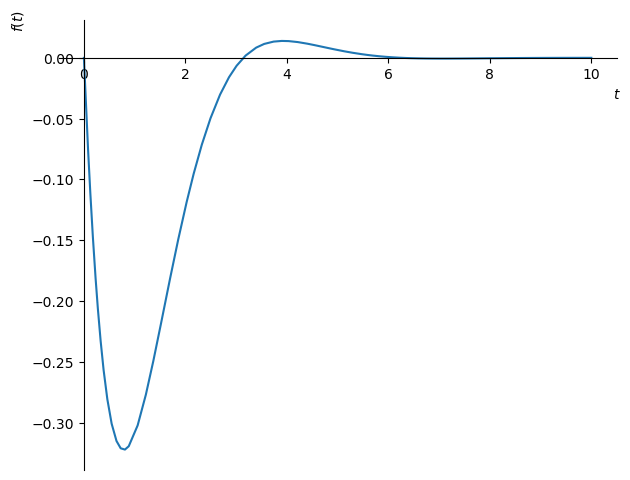

In [2]:
yzi = sym.exp(-t)*sym.cos(t+sym.pi/2)
sym.plot(yzi, (t, 0, 10))


## Caso de raízes repetidas

No caso do polinômio característico ter $r$ raízes repetidas $\lambda_1$, as soluções correspondentes seguem a seguinte forma:

$$e^{\lambda_1 t}, te^{\lambda_1 t}, t^2e^{\lambda_1 t}, ..., t^{r-1}e^{\lambda_1 t}$$

Portanto, se o polinômio característico for:

$$(\lambda-\lambda_1)^r(\lambda - \lambda_{r+1})...(\lambda-\lambda_N) = 0$$

A solução de entrada nula tem a seguinte forma:

$$y_{zi}(t) = c_1e^{\lambda_1 t}+ c_2te^{\lambda_1 t}+c_3t^2e^{\lambda_1 t}, ..., c_{r-1}t^{r-1}e^{\lambda_1 t} + c_{r+1}e^{\lambda_{r+1}t} + ... + c_Ne^{\lambda_N t}$$


### Exemplo 4

Considere um sistema com a seguinte equação diferencial:

$$\frac{d^2y}{dt^2} = -4\frac{dy}{dt} - 4y(t) + 3x(t)$$

com $y(0) = 1$ e $\frac{dy}{dt}(0) = 0$

O polinômio característico é:

$\lambda^2 + 4\lambda + 4 = 0$

As raízes da equação são iguais e iguais a -2. Então, a resposta de entrada nula é:

$y_{zi}(t) = c_1e^{-2t} + c_2te^{-2t}$

Usando as condições iniciais:

$$c_1 = 1 $$

$$\frac{dy}{dt} = -2c_1e^{-2t} + c_2e^{-2t} - 2c_2te^{-2t} \rightarrow -2c_1 + c_2 = 0 \rightarrow c_2=2$$

Então:

$y_{zi}(t) = e^{-2t} + 2te^{-2t}$

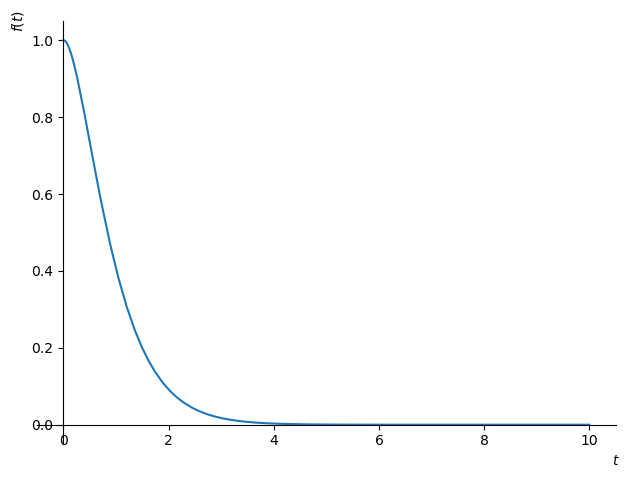

In [3]:
yzi = sym.exp(-2*t)+2*t*sym.exp(-2*t)
sym.plot(yzi, (t, 0, 10))

### Resumo do procedimento para encontrar a solução de entrada nula de uma equação diferencial linear e invariante no tempo

- **1** Eliminar os termos referentes ao sinal de entrada

- **2** Encontrar o polinômio característico da equação diferencial

- **3** Encontrar as raízes $\lambda_i$ do polinômio característico

- **4** Formar o sinal de resposta nula $y_{zi}(t) = c_1e^{\lambda_1 t} + c_2e^{\lambda_2 t} + ... + c_Ne^{\lambda_N t}$ 

Caso a raiz $\lambda_1$ seja repetida $r$ vezes, a saída terá a forma $y_{zi}(t) = c_1e^{\lambda_1 t} + c_2te^{\lambda_1 t} + c_3t^2e^{\lambda_1 t} +... + c_rt^{r-1}e^{\lambda_1 t} + c_{r+1}e^{\lambda_{r+1} t} + ... + c_Ne^{\lambda_N t}$

- **5** Encontrar os valores de $c_i$ utilizando as condições iniciais.

- **6** Caso entre as raízes contenham pares complexos conjugados, juntar os termos para formar cossenos.

## Exercícios

**1)** Encontre a solução de entrada nula para os sistemas descritos pelas seguintes equações diferenciais e condições iniciais.

a) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-6y(t) + \frac{dx}{dt} + x(t)$, com $y(0) = 2, \frac{dy}{dt}(0) = 1$ e $x(t)=u(t)$

b) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-4y(t)  + x(t)$, com $y(0) = 3, \frac{dy}{dt}(0) = -4$ e $x(t) = e^{-3t}u(t)$

c) $\frac{d^2y}{dt^2} = -\frac{dy}{dt} + \frac{dx}{dt} + x(t)$, com $y(0) = 1, \frac{dy}{dt}(0) = 1$ e $x(t) = 25u(t)$

d) $\frac{d^2y}{dt^2} = -4y(t) + x(t)$, com $y(0) = 0, \frac{dy}{dt}(0) = 6$ e $x(t) = cos(2t)u(t)$

e) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-13y(t) + 4\frac{dx}{dt} + 2x(t)$, com $y(0) = 1, \frac{dy}{dt}(0) = 9.9$ e $x(t) = e^{-t}u(t)$





**2)** Um sistema de tempo contínuo, linear e invariante no tempo tem a sua resposta de entrada nula $y_{zi}(t) = 4e^{-2t}u(t) + 2u(t)$

a) Essa resposta pode ter vindo do sistema $\frac{dy}{dt} +2y(t) = x(t)$?

b) Essa resposta pode ter vindo do sistema $\frac{d^2y}{dt^2} = - 2\frac{dy}{dt}+3x(t)$?

c) Essa resposta pode ter vindo do sistema $\frac{d^3y}{dt^3} = - 4\frac{d^2y}{dt^2} - 4\frac{dy}{dt}+2x(t)$?

**3)** Encontre a solução de entrada nula para os sistemas descritos pelas seguintes equações diferenciais e condições iniciais:

a) $\frac{d^2y}{dt^2}+11\frac{dy}{dt}+10y(t) = 5\frac{dx}{dt} + 2x(t)$, com $y(0) = 1$ e $\frac{dy}{dt}(0)=1$ e $x(t) = e^{-3t}u(t)$

b) $\frac{d^2y}{dt^2} = y(t)+\frac{dx}{dt} + x(t)$, com $y(0)=-2$, $\frac{dy}{dt}(0) = 1 $ e $x(t)=e^{-2t}u(t)$

c) $\frac{d^2y}{dt^2} = 2\frac{dy}{dt} - 5y(t) + 7\frac{dx}{dt} +2x(t)$, com $y(0)=-1$, $\frac{dy}{dt}(0) = 3 $ e $x(t)=e^{-5t}u(t)$

d) $\frac{d^3y}{dt^3} = -1\frac{d2y}{dt^2} + 2\frac{d^2x}{dt^2} + 3x(t)$, com $y(0) = 2, \frac{dy}{dt}(0) = 1, \frac{d2y}{dt^2}(0) = 0$ e $x(t) = u(t)$



**4)** Encontre a solução de entrada nula para os sistemas descritos pelas seguintes equações diferenciais:

a) $\frac{d^4 y}{dt^4} = -y(t) + x(t)$, com  com $y(0)=1$, $\frac{dy}{dt}(0) = 1 $, $\frac{d^2y}{dt^2}(0) = 0$, $\frac{d^3y}{dt^3}(0) = -1 $ e $x(t)=e^{-2t}u(t)$

b) $\frac{d^3 y}{dt^3} = -y(t) + x(t) + \frac{dx}{dt}$, com  com $y(0)=1$, $\frac{dy}{dt}(0) = 1 $, $\frac{d^2y}{dt^2}(0) = 0$ e $x(t)=e^{-t}u(t)$

c) $\frac{d^4 y}{dt^4} = -\frac{1}{16}y(t) + x(t)$, com  com $y(0)=1$, $\frac{dy}{dt}(0) = 1 $, $\frac{d^2y}{dt^2}(0) = 0$, $\frac{d^3y}{dt^3}(0) = -1 $ e $x(t)=e^{-3t}u(t)$



## Referências

- Lathi, BP, Sinais e Sistemas Lineares, 2007



## Solução dos exercícios

**2)** Resolvido por Catherine

a) Sistema: $\frac{dy}{dt} + 2y(t) = x(t)$

Resolvendo a equação homogênea associada: $\frac{dy_h}{dt} + 2y_h(t) = 0$. A solução da equação homogênea é $y_h(t) = Ae^{-2t}$. A resposta fornecida é $y_{zi}(t) = 4e^{-2t} + 2$ não corresponde à solução homogênea nem a uma solução particular da equação não homogênea. Portanto, a resposta não pode ter vindo deste sistema.

b) Sistema: $\frac{d^2y}{dt^2} = -2\frac{dy}{dt} + 3x(t)$

Resolvendo a equação homogênea associada: $\frac{d^2y_h}{dt^2} - 2\frac{dy_h}{dt} = 0$. A equação característica associada é $r^2 - 2r = 0$, com raízes $r = 0$ e $r = 2$. Portanto, a solução homogênea é $y_h(t) = (C_1 + C_2e^{2t})u(t)$. A resposta fornecida é $y_{zi}(t) = 4e^{-2t}u(t) + 2u(t)$ que equivale a $C_1=2$ e $C_2=4$. Portanto, essa resposta veio desse sistema.

c) Sistema: $\frac{d^3y}{dt^3} = -4\frac{d^2y}{dt^2} - 4\frac{dy}{dt} + 2x(t)$

Resolvendo a equação homogênea associada: $\frac{d^3y_h}{dt^3} = -4\frac{d^2y_h}{dt^2} - 4\frac{dy_h}{dt}$. A equação característica associada é $r^3 + 4r^2 + 4r = 0$, com raiz $r = 0$. Portanto, a solução homogênea é $y_h(t) = C_1 + C_2t + C_3t^2$. A resposta fornecida é $y_{zi}(t) = 4e^{-2t} + 2$ não corresponde à solução homogênea nem a uma solução particular da equação não homogênea. Portanto, a resposta não pode ter vindo deste sistema.

**3)** Resolvido por Catherine


**a)**
Dada a equação diferencial:
$$\frac{d^2y}{dt^2} + 11\frac{dy}{dt} + 10y(t) = 5\frac{dx}{dt} + 2x(t)$$

E as condições iniciais: $y(0) = 1$ e $\frac{dy}{dt}(0) = 1$, e $x(t) = e^{-3t}u(t)$.

Resolvendo a equação homogênea associada:
$$\frac{d^2y_h}{dt^2} + 11\frac{dy_h}{dt} + 10y_h(t) = 0$$

A equação característica é $r^2 + 11r + 10 = 0$, com raízes reais $r = -1$ e $r = -10$. Portanto, a solução homogênea é:
$$y_h(t) = A e^{-t} + B e^{-10t}$$

Agora, para encontrar a solução particular devido à entrada $x(t) = e^{-3t}u(t)$, será feito $y_{in}(t) = Ce^{-3t}$, uma vez que a entrada é uma exponencial $e^{-3t}$.
Substituindo essa solução na equação diferencial original, obtemos:
$$9C e^{-3t} + 33C e^{-3t} + 10Ce^{-3t} = 0 + 5(-3)e^{-3t} + 2e^{-3t}$$
$$52C e^{-3t} = -15e^{-3t}$$
$$C = -\frac{15}{52}$$

Portanto, a solução de entrada nula é:
$$y_{in}(t) = -\frac{15}{52}e^{-3t}u(t)$$

**b)**
Dada a equação diferencial:
$$\frac{d^2y}{dt^2} = y(t) + \frac{dx}{dt} + x(t)$$

E as condições iniciais: $y(0) = -2$ e $\frac{dy}{dt}(0) = 1$, e $x(t) = e^{-2t}u(t)$.

Resolvendo a equação homogênea associada:
$$\frac{d^2y_h}{dt^2} = y_h(t)$$

A equação característica é $r^2 - 1 = 0$, com raízes reais $r = 1$ e $r = -1$. Portanto, a solução homogênea é:
$$y_h(t) = A e^t + B e^{-t}$$

Agora, para encontrar a solução particular devido à entrada $x(t) = e^{-2t}u(t)$, será feito  $y_{in}(t) = Ce^{-2t}$, uma vez que a entrada é uma exponencial $e^{-2t}$.
Substituindo essa solução na equação diferencial original, obtemos:
$$4C e^{-2t} = 0 + (-2)e^{-2t} + e^{-2t}$$
$$4C e^{-2t} = -e^{-2t}$$
$$C = -\frac{1}{4}$$

Portanto, a solução de entrada nula é:
$$y_{in}(t) = -\frac{1}{4}e^{-2t}u(t)$$

**c)**
Dada a equação diferencial:
$$\frac{d^2y}{dt^2} = 2\frac{dy}{dt} - 5y(t) + 7\frac{dx}{dt} + 2x(t)$$

E as condições iniciais: $y(0) = -1$ e $\frac{dy}{dt}(0) = 3$, e $x(t) = e^{-5t}u(t)$.

Resolvendo a equação homogênea associada:
$$\frac{d^2y_h}{dt^2} = 2\frac{dy_h}{dt} - 5y_h(t)$$

A equação característica é $r^2 - 2r + 5 = 0$, com raízes complexas $r = 1 \pm 2i$. Portanto, a solução homogênea é:
$$y_h(t) = e^t (A \cos(2t) + B \sin(2t))$$

Agora, para encontrar a solução particular devido à entrada $x(t) = e^{-5t}u(t)$, será feito $y_{in}(t) = Ce^{-5t}$, uma vez que a entrada é uma exponencial $e^{-5t}$.
Substituindo essa solução na equação diferencial original, obtemos:
$$25Ce^{-5t} = 2Ce^{-5t} + 2e^{-5t}$$
$$23Ce^{-5t} = 2e^{-5t}$$
$$C = \frac{2}{23}$$

Portanto, a solução de entrada nula é:
$$y_{in}(t) = \frac{2}{23}e^{-5t}u(t)$$

**d)**
Dada a equação diferencial:
$$\frac{d^3y}{dt^3} = -\frac{d^2y}{dt^2} + 2\frac{d^2x}{dt^2} + 3x(t)$$

E as condições iniciais: $y(0) = 2$, $\frac{dy}{dt}(0) = 1$, $\frac{d^2y}{dt^2}(0) = 0$, e $x(t) = u(t)$.

Resolvendo a equação homogênea associada:
$$\frac{d^3y_h}{dt^3} = -\frac{d^2y_h}{dt^2}$$

A equação característica é $r^3 + r^2 = 0$, com raiz real $r = 0$. Portanto, a solução homogênea é:
$$y_h(t) = A + Bt$$

Agora, para encontrar a solução particular devido à entrada $x(t) = u(t)$. Uma entrada degrau unitário não afeta as derivadas da solução, portanto, podemos manter a solução homogênea como a solução particular:
$$y_{in}(t) = A + Bt$$

Usando as condições iniciais, temos:
$$y(0) = A = 2$$
$$\frac{dy}{dt}(0) = B = 1$$

Portanto, a solução de entrada nula é:
$$y_{in}(t) = (2 + t)u(t)$$